In [ ]:
!pip -q install -U pandas numpy scikit-learn matplotlib seaborn



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/toxic_project/train-2.csv"
df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
import os

file_path = '/content/drive/MyDrive/toxic_project/train-2.csv'
if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does NOT exist. Please ensure it's uploaded and the path is correct.")

The file '/content/drive/MyDrive/toxic_project/train-2.csv' exists.


In [ ]:
import os

project_folder_path = '/content/drive/MyDrive/toxic_project'

if os.path.exists(project_folder_path):
    print(f"Contents of '{project_folder_path}':")
    for item in os.listdir(project_folder_path):
        print(item)
else:
    print(f"The folder '{project_folder_path}' does not exist. Please check your Google Drive path.")

Contents of '/content/drive/MyDrive/toxic_project':
train-2.csv
test.csv


In [ ]:
TEXT_COL = "comment_text"
LABEL_COLS = [
    "toxic",
    "severe_toxic",
    "obscene",
    "threat",
    "insult",
    "identity_hate"
]

df = df[[TEXT_COL] + LABEL_COLS].dropna()
df[TEXT_COL] = df[TEXT_COL].astype(str)

df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


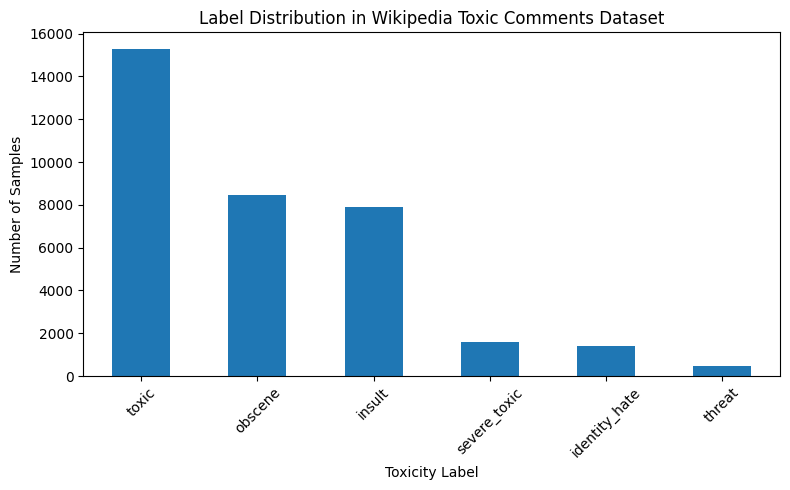

In [ ]:
import matplotlib.pyplot as plt

label_counts = df[LABEL_COLS].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
label_counts.plot(kind="bar")
plt.title("Label Distribution in Wikipedia Toxic Comments Dataset")
plt.ylabel("Number of Samples")
plt.xlabel("Toxicity Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

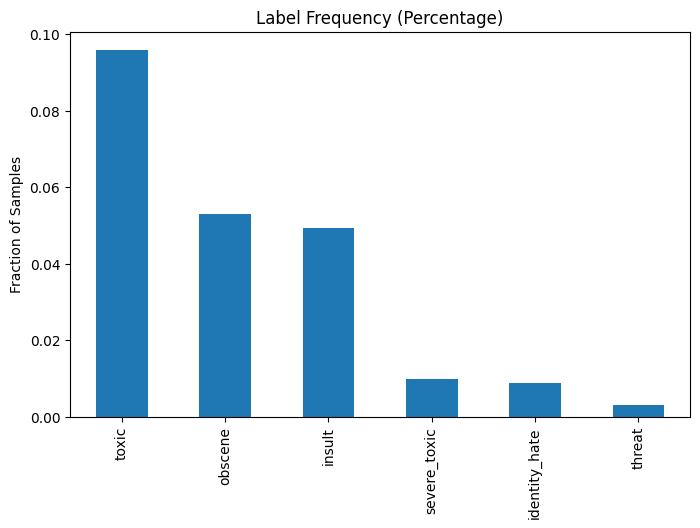

In [ ]:
(label_counts / len(df)).plot(kind="bar", figsize=(8,5))
plt.title("Label Frequency (Percentage)")
plt.ylabel("Fraction of Samples")
plt.show()

In [ ]:
!pip install numpy==1.26.6

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.26.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [ ]:
from sklearn.model_selection import train_test_split

X = df[TEXT_COL].values
y = df[LABEL_COLS].values

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)

Train size: (127656,)
Validation size: (31915,)


In [ ]:
!pip install -U numpy scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

tfidf = TfidfVectorizer(
    lowercase=True,
    ngram_range=(1, 2),
    min_df=2,
    max_features=200000
)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec   = tfidf.transform(X_val)

clf = OneVsRestClassifier(
    LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    )
)

clf.fit(X_train_vec, y_train)

val_probs = clf.predict_proba(X_val_vec)
val_pred  = (val_probs >= 0.5).astype(int)

print("Baseline micro F1:", f1_score(y_val, val_pred, average="micro"))
print("Baseline macro F1:", f1_score(y_val, val_pred, average="macro"))

Baseline micro F1: 0.6954706257611785
Baseline macro F1: 0.5755323592061158


In [ ]:
sample_text = "You are such an idiot. I can't believe you wrote that."

# show tokens/phrases that TF-IDF extracted
analyzer = tfidf.build_analyzer()
tokens = analyzer(sample_text)

print("Original text:\n", sample_text)
print("\nTF-IDF tokens (first 60):\n", tokens[:60])
print("\nTotal tokens:", len(tokens))

Original text:
 You are such an idiot. I can't believe you wrote that.

TF-IDF tokens (first 60):
 ['you', 'are', 'such', 'an', 'idiot', 'can', 'believe', 'you', 'wrote', 'that', 'you are', 'are such', 'such an', 'an idiot', 'idiot can', 'can believe', 'believe you', 'you wrote', 'wrote that']

Total tokens: 19


In [ ]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_val,
        val_pred,
        target_names=LABEL_COLS,
        digits=4
    )
)

               precision    recall  f1-score   support

        toxic     0.6631    0.8495    0.7448      3056
 severe_toxic     0.2968    0.8006    0.4330       321
      obscene     0.7127    0.8694    0.7833      1715
       threat     0.2657    0.7432    0.3915        74
       insult     0.5946    0.8606    0.7033      1614
identity_hate     0.2762    0.7075    0.3973       294

    micro avg     0.5896    0.8476    0.6955      7074
    macro avg     0.4682    0.8051    0.5755      7074
 weighted avg     0.6226    0.8476    0.7124      7074
  samples avg     0.0633    0.0806    0.0679      7074



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, val_pred, target_names=LABEL_COLS, digits=4))

               precision    recall  f1-score   support

        toxic     0.6631    0.8495    0.7448      3056
 severe_toxic     0.2968    0.8006    0.4330       321
      obscene     0.7127    0.8694    0.7833      1715
       threat     0.2657    0.7432    0.3915        74
       insult     0.5946    0.8606    0.7033      1614
identity_hate     0.2762    0.7075    0.3973       294

    micro avg     0.5896    0.8476    0.6955      7074
    macro avg     0.4682    0.8051    0.5755      7074
 weighted avg     0.6226    0.8476    0.7124      7074
  samples avg     0.0633    0.0806    0.0679      7074



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
from sklearn.metrics import f1_score

baseline_micro_f1 = f1_score(y_val, val_pred, average="micro")
baseline_macro_f1 = f1_score(y_val, val_pred, average="macro")

print(baseline_micro_f1, baseline_macro_f1)

0.6954706257611785 0.5755323592061158


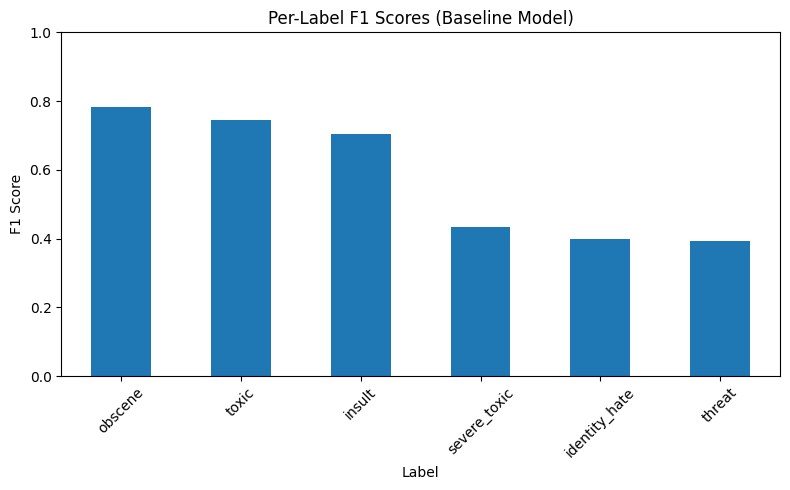

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

f1_per_label = {
    label: f1_score(y_val[:, i], val_pred[:, i])
    for i, label in enumerate(LABEL_COLS)
}

f1_df = pd.Series(f1_per_label).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
f1_df.plot(kind="bar")
plt.title("Per-Label F1 Scores (Baseline Model)")
plt.ylabel("F1 Score")
plt.xlabel("Label")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())

CUDA available: True


In [ ]:
!pip -q install -U transformers accelerate datasets evaluate

In [ ]:
!pip uninstall -y pyarrow datasets transformers scikit-learn scipy
!pip install -U pyarrow datasets transformers scikit-learn scipy
import numpy as np
print("NumPy version after reinstallation:", np.__version__)

Found existing installation: pyarrow 22.0.0
Uninstalling pyarrow-22.0.0:
  Successfully uninstalled pyarrow-22.0.0
Found existing installation: datasets 4.4.2
Uninstalling datasets-4.4.2:
  Successfully uninstalled datasets-4.4.2
Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Found existing installation: scikit-learn 1.8.0
Uninstalling scikit-learn-1.8.0:
  Successfully uninstalled scikit-learn-1.8.0
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
  Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
  Using cached datasets-4.4.2-py3-none-any.whl.metadata (19 kB)
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_1

NumPy version after reinstallation: 2.4.0


In [ ]:
import numpy as np
import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

Please restart the Colab runtime (Runtime -> Restart runtime) after executing the above cell for the changes to take effect. This is crucial for the new installations to be fully loaded.

In [ ]:
trainer.save_model(SAVE_DIR)
tokenizer.save_pretrained(SAVE_DIR)
print(f"Model and tokenizer saved to {SAVE_DIR}")

Model and tokenizer saved to /content/drive/MyDrive/toxic_project/distilbert_model


The model and tokenizer have now been saved to your Google Drive at the specified `SAVE_DIR` path. You can now load them directly in future sessions without retraining.

In [ ]:
train_ds = Dataset.from_dict({
    "text": list(X_train),
    "labels": y_train.astype(np.float32).tolist()   # <-- important: float32
})

val_ds = Dataset.from_dict({
    "text": list(X_val),
    "labels": y_val.astype(np.float32).tolist()     # <-- important: float32
})

train_ds, val_ds

(Dataset({
     features: ['text', 'labels'],
     num_rows: 127656
 }),
 Dataset({
     features: ['text', 'labels'],
     num_rows: 31915
 }))

In [ ]:
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=192
    )

train_ds = train_ds.map(tokenize, batched=True)
val_ds   = val_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
val_ds   = val_ds.remove_columns(["text"])

train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/127656 [00:00<?, ? examples/s]

Map:   0%|          | 0/31915 [00:00<?, ? examples/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(LABEL_COLS),
    problem_type="multi_label_classification"
)

model.config.id2label = {i: LABEL_COLS[i] for i in range(len(LABEL_COLS))}
model.config.label2id = {LABEL_COLS[i]: i for i in range(len(LABEL_COLS))}

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = 1 / (1 + np.exp(-logits))          # sigmoid
    preds = (probs >= 0.5).astype(int)
    return {
        "micro_f1": f1_score(labels, preds, average="micro"),
        "macro_f1": f1_score(labels, preds, average="macro"),
    }

In [ ]:
args = TrainingArguments(
    output_dir="distilbert_toxic",
    eval_strategy="epoch",
    save_strategy="no",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=torch.cuda.is_available(),
    report_to="none",
)

In [ ]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()
trans_eval = trainer.evaluate()
trans_eval

/tmp/ipython-input-3784850998.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Micro F1,Macro F1
1,0.039000,0.036804,0.793835,0.612118
2,0.029400,0.036696,0.799887,0.672937
3,0.023000,0.040791,0.799034,0.675056


{'eval_loss': 0.040790777653455734,
 'eval_micro_f1': 0.7990338850607374,
 'eval_macro_f1': 0.6750560843301879,
 'eval_runtime': 41.0051,
 'eval_samples_per_second': 778.319,
 'eval_steps_per_second': 24.338,
 'epoch': 3.0}

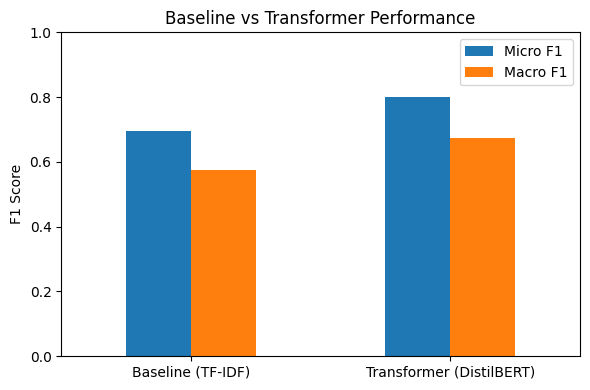

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(
    {
        "Micro F1": [baseline_micro_f1, trans_eval["eval_micro_f1"]],
        "Macro F1": [baseline_macro_f1, trans_eval["eval_macro_f1"]],
    },
    index=["Baseline (TF-IDF)", "Transformer (DistilBERT)"]
)

results_df.plot(kind="bar", figsize=(6,4))
plt.title("Baseline vs Transformer Performance")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

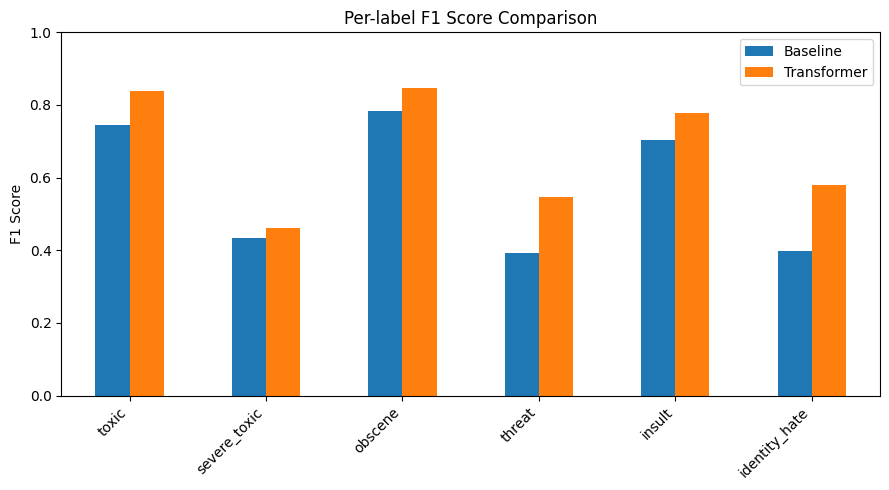

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# baseline per-label F1
baseline_f1 = {
    label: f1_score(y_val[:, i], val_pred[:, i])
    for i, label in enumerate(LABEL_COLS)
}

# transformer predictions on validation set
# get logits -> probs -> preds
import torch
model.eval()

all_logits = []
with torch.no_grad():
    for batch in trainer.get_eval_dataloader():
        batch = {k: v.to(model.device) for k, v in batch.items()}
        outputs = model(**batch)
        all_logits.append(outputs.logits.cpu())

logits = torch.cat(all_logits, dim=0).numpy()
probs = 1 / (1 + np.exp(-logits))
trans_pred = (probs >= 0.5).astype(int)

trans_f1 = {
    label: f1_score(y_val[:, i], trans_pred[:, i])
    for i, label in enumerate(LABEL_COLS)
}

compare_df = pd.DataFrame(
    {
        "Baseline": baseline_f1,
        "Transformer": trans_f1,
    }
)

compare_df.plot(kind="bar", figsize=(9,5))
plt.title("Per-label F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

SAVE_DIR = "/content/drive/MyDrive/toxic_project/distilbert_model"

tokenizer = AutoTokenizer.from_pretrained(SAVE_DIR, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(SAVE_DIR, local_files_only=True)
model.eval()

print("Model saved")

Model saved


In [ ]:
# First, make sure your Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Define SAVE_DIR as you did before
SAVE_DIR = "/content/drive/MyDrive/toxic_project/distilbert_model"

# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(SAVE_DIR, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(SAVE_DIR, local_files_only=True)

# Set the model to evaluation mode (important for inference)
model.eval()

print("Model and tokenizer loaded successfully from Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model and tokenizer loaded successfully from Google Drive.


In [ ]:
import torch
import numpy as np

def predict_comment(text, threshold=0.5):
    model.eval()
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=192
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        logits = model(**inputs).logits[0]
        probs = torch.sigmoid(logits).cpu().numpy()

    scores = {LABEL_COLS[i]: float(probs[i]) for i in range(len(LABEL_COLS))}
    flagged = [k for k, v in scores.items() if v >= threshold]

    return {
        "flagged_labels": flagged,
        "scores": scores
    }

# Example
predict_comment("I will kill you", threshold=0.5)

{'flagged_labels': ['toxic', 'threat'],
 'scores': {'toxic': 0.9568578004837036,
  'severe_toxic': 0.1809949427843094,
  'obscene': 0.24298787117004395,
  'threat': 0.9294294118881226,
  'insult': 0.2057819664478302,
  'identity_hate': 0.0366009883582592}}